# Supervised Learning Project

# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Learning Outcomes:
     Exploratory Data Analysis
     Preparing the data to train a model
     Training and making predictions using a classification model
     Model evaluation

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks:

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
import collections
from scipy.stats import zscore

# Step 1. Read the column description and ensure you understand each attribute well

In [2]:
Bank_Data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
Bank_Data.shape

(5000, 14)

In [3]:
Bank_Data.columns #Illustrates the columns or features of the data

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Attribute Information:
     ID                 : Customer ID
     Age                : Customer's age in completed years
     Experience         : #years of professional experience
     Income             : Annual income of the customer ($000)
 ZIP Code           : Home Address ZIP code.
 Family             : Family size of the customer
 CCAvg              : Avg. spending on credit cards per month ($000)
     Education          : Education Level.
                            1. Undergrad
                            2. Graduate
                            3. Advanced/Professional
     Mortgage           : Value of house mortgage if any. ($000)
     Personal Loan      : Did this customer accept the personal loan offered in the last campaign?
     Securities Account : Does the customer have a securities account with the bank?
     CD Account         : Does the customer have a certificate of deposit (CD) account with the bank?
     Online             : Does the customer use internet banking facilities?
     Credit card        : Does the customer use a credit card issued by Universal Bank?

In [4]:
Bank_Data.head(10).transpose() #Gives description of initial 10 rows of data so that we can have a quick overview of data

,0,1,2,3,4,5,6,7,8,9
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Age,25.0,45.0,39.0,35.0,35.0,37.0,53.0,50.0,35.0,34.0
Experience,1.0,19.0,15.0,9.0,8.0,13.0,27.0,24.0,10.0,9.0
Income,49.0,34.0,11.0,100.0,45.0,29.0,72.0,22.0,81.0,180.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0,92121.0,91711.0,93943.0,90089.0,93023.0
Family,4.0,3.0,1.0,1.0,4.0,4.0,2.0,1.0,3.0,1.0
CCAvg,1.6,1.5,1.0,2.7,1.0,0.4,1.5,0.3,0.6,8.9
Education,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0
Mortgage,0.0,0.0,0.0,0.0,0.0,155.0,0.0,0.0,104.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Description of data attributes

In [5]:
Bank_Data.describe().transpose() #It gives the count of entries, mean, standard deviation and 5 point summary of each numeric columns.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
Bank_Data.info() #It shows data types of every attributes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Step 2. Study the data distribution in each attribute, share your findings (15 marks)

# Checking for any missing values in entire dataset

In [7]:
Bank_Data.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

From above we infer that there is no missing value in entire dataframe.

# 1. Study of ID

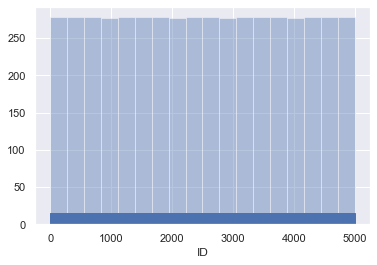

In [8]:
#distribution of customer ID
sns.distplot(Bank_Data['ID'],kde=False, rug=True)

It shows uniformly distributed since id is serial no. & every no. occuring once.

# 2. Study of Age

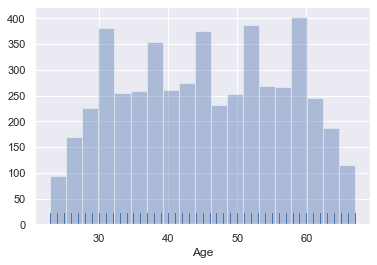

In [9]:
#distribution of Customer's age in completed years
sns.distplot(Bank_Data['Age'],kde=False, rug=True)

The above figure shows it is almost symmetric distribution

In [10]:
print(Bank_Data['Age'].mode()) #prints the most frequent age of customer

0    35
dtype: int64


In [11]:
counter=collections.Counter(Bank_Data['Age']) #prints the counts of the top most frequent age of customer
print(counter.most_common(5))

[(35, 151), (43, 149), (52, 145), (58, 143), (54, 143)]


# 3. Study of Experience

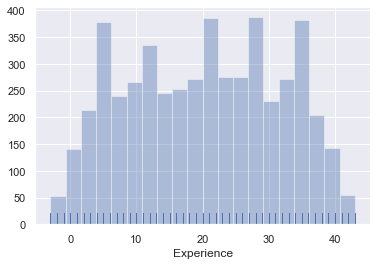

In [12]:
#distribution of customer's years of professional experience
sns.distplot(Bank_Data['Experience'],kde=False, rug=True)

The above figure shows it is almost symmetric distribution

In [13]:
print(Bank_Data['Experience'].mode()) #prints the most frequent years of professional experience of customer

0    32
dtype: int64


In [14]:
counter=collections.Counter(Bank_Data['Experience']) #prints the counts of the 5 top most frequent years of professional experience of customer
print(counter.most_common(5))

[(32, 154), (20, 148), (9, 147), (5, 146), (23, 144)]


# 4. Study of Income

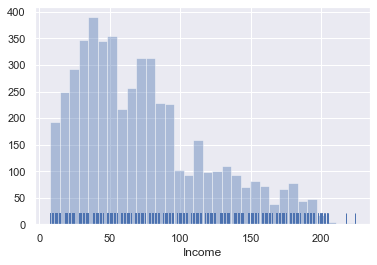

In [15]:
#distribution of Annual income of the customer ($000)
sns.distplot(Bank_Data['Income'],kde=False, rug=True)

The above figure shows it is a positively skewed distribution

In [16]:
print(Bank_Data['Income'].mode()) #prints the most frequent Annual income of the customer ($000)

0    44
dtype: int64


In [17]:
counter=collections.Counter(Bank_Data['Experience']) #prints the counts of the 4 top most frequent Annual income of the customer ($000)
print(counter.most_common(4))

[(32, 154), (20, 148), (9, 147), (5, 146)]


# 5. Study of ZIP Code

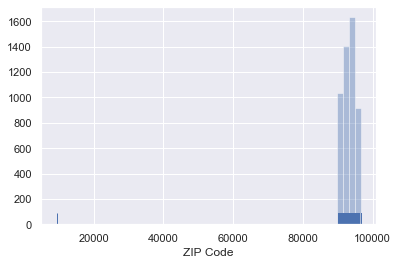

In [18]:
#distribution of customer's Home Address ZIP code
sns.distplot(Bank_Data['ZIP Code'],kde=False, rug=True)

The above distribution shows that the zip code is concentrated around 90000 that is of 5 digits having some outliers

In [19]:
Bank_Data['ZIP Code'].value_counts() #gives count of every attributes of customer's Home Address ZIP code

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Code to deal with outlier

In [20]:
Q1 = Bank_Data['ZIP Code'].quantile(0.25) #code to print the location of outlier
Q3 = Bank_Data['ZIP Code'].quantile(0.75)
IQR = Q3 - Q1
np.where((Bank_Data['ZIP Code'] < (Q1 - 1.5 * IQR)) | (Bank_Data['ZIP Code'] > (Q3 + 1.5 * IQR)))

(array([384], dtype=int64),)

In [21]:
#The above result shows the home address zip code of customer has only one outlier at index location 384 of the column
Bank_Data['ZIP Code'][384] #prints the value of outlier

9307

The above analysis shows that there might be mistake in data entry which means it is quite possible that the last digit might have missed while entering value in dataset.

In [22]:
Bank_Data.loc[384,'ZIP Code'] = 93070  # replace the outlier with possible dta 93070, so that outlier may not cause problem in data analysis.

In [23]:
#checking whether any outlier still remains
np.where((Bank_Data['ZIP Code'] < (Q1 - 1.5 * IQR)) | (Bank_Data['ZIP Code'] > (Q3 + 1.5 * IQR)))

(array([], dtype=int64),)

# 6. Study of Family size

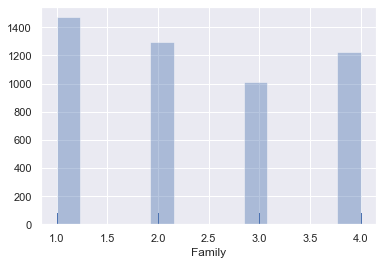

In [24]:
#distribution of Family size of the customer
sns.distplot(Bank_Data['Family'],kde=False, rug=True)

In [25]:
Bank_Data['Family'].value_counts() #gives count of every attributes of Family size of the customer

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

The above result shows that there are only 4 categories of family size of the customer

# 7. Study of CCAvg

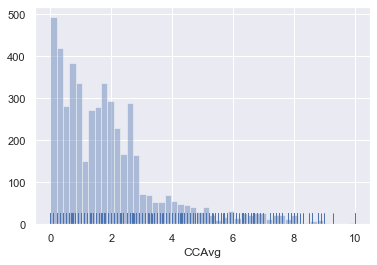

In [26]:
#distribution of customer's Avg. spending on credit cards per month ($000)
sns.distplot(Bank_Data['CCAvg'],kde=False, rug=True)

The above figure shows it is a positively skewed distribution

In [27]:
print(Bank_Data['CCAvg'].mode()) #prints the most frequent customer's Avg. spending on credit cards per month ($000)

0    0.3
dtype: float64


In [28]:
counter=collections.Counter(Bank_Data['CCAvg']) #prints the counts of the 4 top most frequent customer's Avg. spending on credit cards per month ($000)
print(counter.most_common(4))

[(0.3, 241), (1.0, 231), (0.2, 204), (2.0, 188)]


# 8. Study of Education

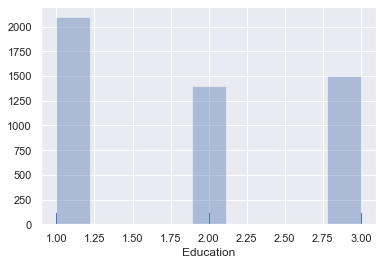

In [29]:
#distribution of customer's Education Level.
                        #1. Undergrad
                        #2. Graduate
                        #3. Advanced/Professional ID
sns.distplot(Bank_Data['Education'],kde=False, rug=True)

In [30]:
Bank_Data['Education'].value_counts() #gives count of #1. Undergrad, #2. Graduate, #3. Advanced/Professional of education level of customer

1    2096
3    1501
2    1403
Name: Education, dtype: int64

As it is a categorical variable hence replacing it with one hot encoding

In [31]:
Bank_Data['Education'] = Bank_Data['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1,2.7,1
Education,Undergrad,Undergrad,Undergrad,Graduate,Graduate
Mortgage,0,0,0,0,0
Personal Loan,0,0,0,0,0


create 3 simple true or false columns with titles equivalent to "Education_Advanced/Professional" "Education_Graduate"	"Education_Undergrad". These will be used as independent variables without imposing any kind of ordering between the three categories.

In [32]:
Bank_Data = pd.get_dummies(Bank_Data, columns=['Education'])
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0


# 9. Study of Mortgage

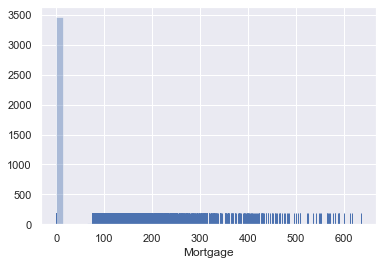

In [33]:
#distribution of customer's Value of house mortgage if any. ($000)
sns.distplot(Bank_Data['Mortgage'],kde=False, rug=True)

In [34]:
Bank_Data['Mortgage'].value_counts() #gives count of every attributes of customer's Value of house mortgage if any. ($000)

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

From above we can see that most of the customers does not have any value of house mortgage

# 10. Study of Securities Account

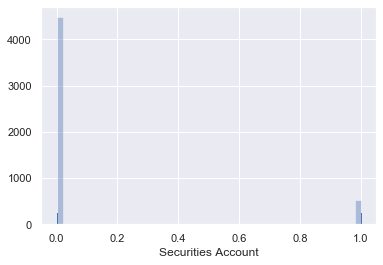

In [35]:
#distribution of whether the customer have a securities account with the bank?
sns.distplot(Bank_Data['Securities Account'],kde=False, rug=True)

In [36]:
Bank_Data['Securities Account'].value_counts() #gives count of every attributes of whether the customer have a securities account with the bank?

0    4478
1     522
Name: Securities Account, dtype: int64

From above we can see that most of the customers does not have any securities account with the bank.

As it is a categorical variable hence replacing it with one hot encoding

In [37]:
Bank_Data['Securities Account'] = Bank_Data['Securities Account'].replace({0: 'No', 1: 'Yes'})
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1,2.7,1
Mortgage,0,0,0,0,0
Personal Loan,0,0,0,0,0
Securities Account,Yes,Yes,No,No,No


create 2 simple true or false columns with titles equivalent to "Securities Account_No"	"Securities Account_Yes". These will be used as independent variables without imposing any kind of ordering between the two categories.

In [38]:
Bank_Data = pd.get_dummies(Bank_Data, columns=['Securities Account'])
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0


# 11. Study of CD Account

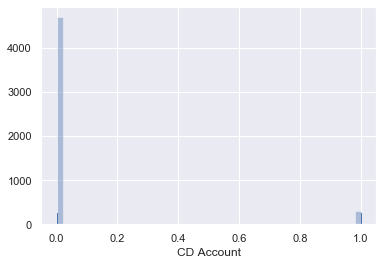

In [39]:
#distribution of whether the customer have a certificate of deposit (CD) account with the bank?       
sns.distplot(Bank_Data['CD Account'],kde=False, rug=True)

In [40]:
Bank_Data['CD Account'].value_counts() #gives count of every attributes of whether the customer have a certificate of deposit (CD) account with the bank?

0    4698
1     302
Name: CD Account, dtype: int64

From above we can see that most of the customers does not have a certificate of deposit (CD) account with the bank.

As it is a categorical variable hence replacing it with one hot encoding

In [41]:
Bank_Data['CD Account'] = Bank_Data['CD Account'].replace({0: 'No', 1: 'Yes'})
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1,2.7,1
Mortgage,0,0,0,0,0
Personal Loan,0,0,0,0,0
CD Account,No,No,No,No,No


create 2 simple true or false columns with titles equivalent to "CD Account_No"	"CD Account_Yes". These will be used as independent variables without imposing any kind of ordering between the two categories.

In [42]:
Bank_Data = pd.get_dummies(Bank_Data, columns=['CD Account'])
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0


# 12. Study of Online

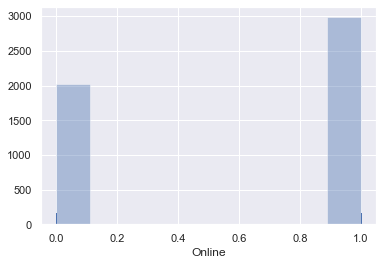

In [43]:
#distribution of whether the customer use internet banking facilities?
sns.distplot(Bank_Data['Online'],kde=False, rug=True)

In [44]:
Bank_Data['Online'].value_counts() #gives count of every attributes of whether the customer use internet banking facilities?

1    2984
0    2016
Name: Online, dtype: int64

From above we can see that the number of customers who use internet banking facilities is slightly more than those who does not.

As it is a categorical variable hence replacing it with one hot encoding

In [45]:
Bank_Data['Online'] = Bank_Data['Online'].replace({0: 'No', 1: 'Yes'})
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1,2.7,1
Mortgage,0,0,0,0,0
Personal Loan,0,0,0,0,0
Online,No,No,No,No,No


create 2 simple true or false columns with titles equivalent to "Online_No"	"Online_Yes". These will be used as independent variables without imposing any kind of ordering between the two categories.

In [46]:
Bank_Data = pd.get_dummies(Bank_Data, columns=['Online'])
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


# 13. Study of CreditCard

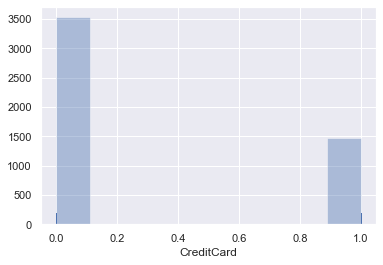

In [47]:
#distribution of whether the customer use a credit card issued by Universal Bank?
sns.distplot(Bank_Data['CreditCard'],kde=False, rug=True)

In [48]:
Bank_Data['CreditCard'].value_counts() #gives count of every attributes of whether the customer use a credit card issued by Universal Bank?

0    3530
1    1470
Name: CreditCard, dtype: int64

From above we can see that most of the customers don't use credit card issued by Universal Bank.

As it is a categorical variable hence replacing it with one hot encoding

In [49]:
Bank_Data['CreditCard'] = Bank_Data['CreditCard'].replace({0: 'No', 1: 'Yes'})
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1,2.7,1
Mortgage,0,0,0,0,0
Personal Loan,0,0,0,0,0
CreditCard,No,No,No,No,Yes


create 2 simple true or false columns with titles equivalent to "CreditCard_No"	"CreditCard_Yes". These will be used as independent variables without imposing any kind of ordering between the two categories.

In [50]:
Bank_Data = pd.get_dummies(Bank_Data, columns=['CreditCard'])
Bank_Data.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Education_Advanced/Professional,0.0,0.0,0.0,0.0,0.0


# Step 3. Get the target column distribution. Your comments (5 marks)

The target column is Personal Loan

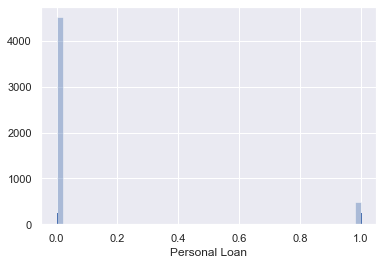

In [51]:
#distribution of whether this customer accepted the personal loan offered in the last campaign?
sns.distplot(Bank_Data['Personal Loan'],kde=False, rug=True)

In [52]:
Bank_Data['Personal Loan'].value_counts() #gives count of every attributes of whether this customer accepted the personal loan offered in the last campaign?

0    4520
1     480
Name: Personal Loan, dtype: int64

From above we can see that most of the customers didn't accept the personal loan offered in the last campaign

# Study of Relative distribution between different attributes of data

# Correlation

In [53]:
Bank_Data.drop("ID", axis=1, inplace=True) #Removing ID from data as it does not effect the analysis

In [54]:
print(Bank_Data.shape) #prints the dimension of  data after doing one hot encoding and removing "ID"

(5000, 19)


In [55]:
Bank_Data.corr()  # prints the correlation coefficient between every pair of attributes

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Education_Advanced/Professional,Education_Graduate,Education_Undergrad,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online_No,Online_Yes,CreditCard_No,CreditCard_Yes
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,-0.012539,-0.007726,0.045838,-0.016264,-0.027770,0.000436,-0.000436,-0.008043,0.008043,-0.013702,0.013702,-0.007681,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,-0.010582,-0.007413,0.020967,-0.018197,-0.002907,0.001232,-0.001232,-0.010353,0.010353,-0.013898,0.013898,-0.008967,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030708,-0.157501,0.645984,0.206806,0.502462,-0.108878,-0.128364,0.218019,0.002616,-0.002616,-0.169738,0.169738,-0.014206,0.014206,0.002385,-0.002385
ZIP Code,-0.030530,-0.030456,-0.030708,1.000000,0.027511,-0.012188,0.003614,-0.002974,-0.026612,0.038844,-0.010649,-0.002422,0.002422,-0.021671,0.021671,-0.028316,0.028316,-0.024032,0.024032
Family,-0.046418,-0.052563,-0.157501,0.027511,1.000000,-0.109275,-0.020445,0.061367,-0.008744,0.139201,-0.118628,-0.019994,0.019994,-0.014110,0.014110,-0.010354,0.010354,-0.011588,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,0.109905,0.366889,-0.080413,-0.090366,0.156979,-0.015086,0.015086,-0.136534,0.136534,0.003611,-0.003611,0.006689,-0.006689
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,1.000000,0.142095,-0.014942,-0.031806,0.042841,0.005411,-0.005411,-0.089311,0.089311,0.005995,-0.005995,0.007231,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.142095,1.000000,0.090212,0.071491,-0.148894,-0.021954,0.021954,-0.316355,0.316355,-0.006278,0.006278,-0.002802,0.002802
Education_Advanced/Professional,0.045838,0.020967,-0.108878,-0.026612,-0.008744,-0.080413,-0.014942,0.090212,1.000000,-0.409051,-0.556437,0.012421,-0.012421,-0.009780,0.009780,0.023837,-0.023837,0.004113,-0.004113
Education_Graduate,-0.016264,-0.018197,-0.128364,0.038844,0.139201,-0.090366,-0.031806,0.071491,-0.409051,1.000000,-0.530586,-0.005134,0.005134,-0.006089,0.006089,-0.020590,0.020590,0.012196,-0.012196


# Pairplot for checking the correlation

In [ ]:
sns.pairplot(Bank_Data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

# Heatmap For checking the correlation

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Bank_Data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show() # the color intensity is based on correlation facror

1. Here we can see that the Age and Experience are highly correlate with each other.
2. Income and CCAvg are moderately correlated.
3. None of the attributes are highly correlated with personal loan but Income is 50%, CCAvg is 37% and CD Account is 32% corrlated with personal loan.

# Step 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [56]:
X = Bank_Data.drop("Personal Loan" , axis=1) #input attributes are all the features of data except Personal Loan
y = Bank_Data["Personal Loan"] #Target attribute is Personal Loan of data

In [57]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,-1.693312e-16,1.0001,-2.014911,-0.881204,-0.009122,0.862960,1.996667
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
ZIP Code,5000.0,-2.329215e-15,1.0001,-1.798609,-0.715211,0.152190,0.817803,1.979074
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Education_Advanced/Professional,5000.0,-3.148592e-17,1.0001,-0.654965,-0.654965,-0.654965,1.526798,1.526798
Education_Graduate,5000.0,-2.122302e-16,1.0001,-0.624538,-0.624538,-0.624538,1.601185,1.601185
Education_Undergrad,5000.0,-6.365575e-16,1.0001,-0.849566,-0.849566,-0.849566,1.177071,1.177071


In [58]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.30, random_state=1) #split the data into test=30% and train=70%

In [59]:
print(X_train.shape) #prints the dimension of independent train data

(3500, 18)


In [60]:
print(X_test.shape) #prints the dimension of independent test data

(1500, 18)


In [61]:
print(y_train.shape) #prints the dimension of dependent train data

(3500,)


In [62]:
print(y_test.shape) #prints the dimension of dependent test data

(1500,)


Check split of data

In [63]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Bank_Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Bank_Data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Check Personal Loan True/False ratio in split data

In [64]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data["Personal Loan"] == 1]), (len(Bank_Data.loc[Bank_Data["Personal Loan"] == 1])/len(Bank_Data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data["Personal Loan"] == 0]), (len(Bank_Data.loc[Bank_Data["Personal Loan"] == 0])/len(Bank_Data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



# Step 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

# Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic model
Logistic_model = LogisticRegression(solver="liblinear")

# Fit the Logistic model on train data
Logistic_model.fit(X_train, y_train)

# Predict the output on test data of Logistic model
Logistic_y_predict = Logistic_model.predict(X_test)

# Print the coefficient of Logistic model model
Logistic_coef_df = pd.DataFrame(Logistic_model.coef_)
Logistic_coef_df['intercept'] = Logistic_model.intercept_
print("Coefficient of Logistic Regression Model = ",Logistic_coef_df)

Coefficient of Logistic Regression Model =            0         1         2         3         4         5         6  \
0 -0.101998  0.156407  2.504658 -0.017073  0.685463  0.358407  0.099327   

          7         8         9        10        11        12        13  \
0  0.651541  0.584327 -1.137276  0.166374 -0.166374 -0.430863  0.430863   

         14        15        16        17  intercept  
0  0.150103 -0.150103  0.226124 -0.226124  -4.811493  


# Accuracy of Logistic model on train and test data

In [87]:
Logistic_train_accuracy = Logistic_model.score(X_train, y_train)
print("Accuracy of Logistic model on Train data is {0:.4f}",Logistic_train_accuracy)
Logistic_test_accuracy = Logistic_model.score(X_test, y_test)
print("Accuracy of Logistic model on Test data is {0:.4f}",Logistic_test_accuracy)

Accuracy of Logistic model on Train data is {0:.4f} 0.9571428571428572
Accuracy of Logistic model on Test data is {0:.4f} 0.958


#  Naive Bayes Model

In [67]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# Create the Naive Bayes model
NB_model = GaussianNB()

# Fit the Naive Bayes model on train data
NB_model.fit(X_train, y_train.ravel())

# Predict the output on test data of Naive Bayes model
NB_y_predict = NB_model.predict(X_test)

# Accuracy of Naive Bayes model on train and test data

In [88]:
NB_train_accuracy = NB_model.score(X_train, y_train)
print("Accuracy of Naive Bayes model on Train data is {0:.4f}",NB_train_accuracy)
NB_test_accuracy = NB_model.score(X_test, y_test)
print("Accuracy of Naive Bayes model on Test data is {0:.4f}",NB_test_accuracy)

Accuracy of Naive Bayes model on Train data is {0:.4f} 0.8971428571428571
Accuracy of Naive Bayes model on Test data is {0:.4f} 0.8853333333333333


# KNN Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

First we write code for choosing the value of k at which data has best performance then we biuld KNN model using that k

In [69]:
KNN_accuracy =[]
for k in range(1,50):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_model.fit(X_train, y_train)
    KNN_accuracy.append(KNN_model.score(X_test, y_test))

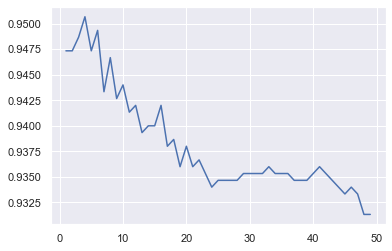

In [70]:
plt.plot(range(1,50),KNN_accuracy)

In [75]:
max_accuracy=max(KNN_accuracy) #Gives the value of maximum accuracy with respect to k value
print(max_accuracy)

0.9506666666666667


In [78]:
k_final = KNN_accuracy.index(max_accuracy) #Gives the corresponding value of k where it has maximum accuracy
print(k_final)

3


Build the KNN model taking k = from above

In [79]:
# Create the KNN model
KNN_model = KNeighborsClassifier(n_neighbors= k_final , weights = 'distance' )

# Fit the KNN model on train data
KNN_model.fit(X_train, y_train)

# Predict the output on test data of KNN model
KNN_y_predict = KNN_model.predict(X_test)

# Accuracy of KNN model on train and test data

In [89]:
KNN_train_accuracy = KNN_model.score(X_train, y_train)
print("Accuracy of KNN model on Train data is {0:.4f}",KNN_train_accuracy)
KNN_test_accuracy = KNN_model.score(X_test, y_test)
print("Accuracy of KNN model on Test data is {0:.4f}",KNN_test_accuracy)

Accuracy of KNN model on Train data is {0:.4f} 1.0
Accuracy of KNN model on Test data is {0:.4f} 0.9486666666666667


# Step 6. Print the confusion matrix for all the above models (5 marks)

In [80]:
from sklearn import metrics

# Logistic Confusion Matrix

In [81]:
Logistic_cm=metrics.confusion_matrix(y_test, Logistic_y_predict, labels=[1, 0])
print("Logistic Confusion Matrix=",Logistic_cm)

Logistic Confusion Matrix= [[  98   51]
 [  12 1339]]


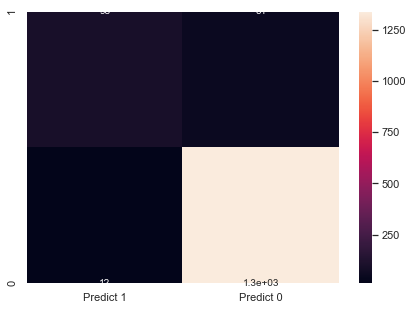

In [82]:
#Code for pictorial representation of confusion matrix (Heatmap of confusion matrix)
df_Logistic_cm = pd.DataFrame(Logistic_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_Logistic_cm, annot=True)

# Naive Bayes Confusion Matrix

In [83]:
NB_cm=metrics.confusion_matrix(y_test, NB_y_predict, labels=[1, 0])
print("Naive Bayes Confusion Matrix = ",NB_cm)

Naive Bayes Confusion Matrix =  [[  75   74]
 [  98 1253]]


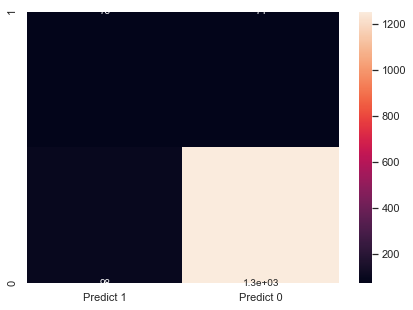

In [84]:
#Code for pictorial representation of confusion matrix (Heatmap of confusion matrix)
df_NB_cm = pd.DataFrame(NB_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_NB_cm, annot=True)

# KNN Confusion Matrix

In [85]:
KNN_cm=metrics.confusion_matrix(y_test, KNN_y_predict, labels=[1, 0])
print("KNN Confusion Matrix = ",NB_cm)

KNN Confusion Matrix =  [[  75   74]
 [  98 1253]]


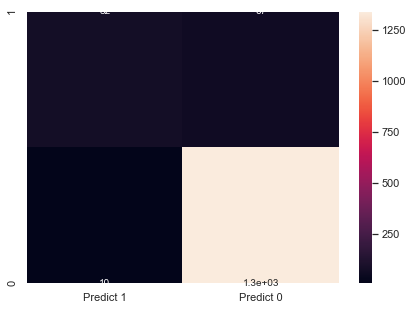

In [86]:
#Code for pictorial representation of confusion matrix (Heatmap of confusion matrix)
df_KNN_cm = pd.DataFrame(KNN_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_KNN_cm, annot=True)

# Step 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

# Performance of Logistic model 

In [90]:
print("Logistic Regression Classification Report")
print(metrics.classification_report(y_test, Logistic_y_predict, labels=[1, 0]))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.89      0.66      0.76       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 89% and recall (out of all actual true what fraction is identified) = 66% is f1 score of true = 76% is above 70%

# Performance of Naive Bayes model 

In [91]:
print("Naive Bayes Classification Report")
print(metrics.classification_report(y_test, NB_y_predict, labels=[1, 0]))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.43      0.50      0.47       149
           0       0.94      0.93      0.94      1351

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.89      0.89      0.89      1500



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 43% and recall (out of all actual true what fraction is identified) = 50% is f1 score of true = 47% is below 50%

# Performance of KNN model 

In [92]:
print("KNN Classification Report")
print(metrics.classification_report(y_test, KNN_y_predict, labels=[1, 0]))

KNN Classification Report
              precision    recall  f1-score   support

           1       0.89      0.55      0.68       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 89% and recall (out of all actual true what fraction is identified) = 55% is f1 score of true = 68% is below 70%

# From above analysis we say that Logistic regression model is best for this data having highest f1 score of 76%

1. Logistic Regression model is best because it is best suited for all the attributes of dat 
2. The independent data also contains yes and no type categories having only two values whereas while modeling naive byes we make a typical assumption that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.
3. A drawback of KNN is the basic "majority voting" classification occurs when the class distribution is skewed, and the given data contains some skewed attributes as well.